In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [26]:
df = pd.read_csv('shopeep_koreantop_clothing_shop_data.csv')

In [27]:
df.head()

,pk_shop,date_collected,shopid,name,join_month,join_day,join_year,item_count,follower_count,response_time,response_rate,shop_location,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop
0,20210613254711738,2021-06-13,254711738,hello.may.ph,April,27,2020,446,17487,10:13:55,96,NaN,181,17510,729,4.81,1,0
1,20210613314198143,2021-06-13,314198143,love.women.shop,September,25,2020,263,8574,10:43:05,73,"San Nicolas,Metro Manila",78,2656,198,4.68,0,0
2,2021061310377223,2021-06-13,10377223,R&O RedOrange,September,27,2016,209,660417,08:32:07,90,"Pasay City,Metro Manila",4647,1071829,18073,4.91,1,0
3,2021061321407329,2021-06-13,21407329,patriciacai,April,30,2017,165,18787,09:10:38,94,"Binondo,Metro Manila",44,18959,215,4.94,1,0
4,2021061311187885,2021-06-13,11187885,Little Market Manila,October,18,2016,467,67371,11:40:59,89,"Caloocan City,Metro Manila",680,39252,2383,4.73,1,0


### Vẽ biểu đồ:
- So sánh số lượng shop gia nhập theo các năm.
- Xu hướng của số lượng shop gia nhập theo từng tháng trong từng năm.

In [28]:
year = df.groupby('join_year')[['shopid']].nunique().reset_index()
year

,join_year,shopid
0,2015,1
1,2016,11
2,2017,72
3,2018,48
4,2019,53
5,2020,130
6,2021,72


In [29]:
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True

In [46]:
month_and_year =  df.groupby( ['join_year','join_month'])[['shopid']].nunique().unstack()
year = month_and_year.sum()

In [48]:
year.plot.line(marker = '*',ax = axes2, color = 'red', label = 'per year')

<AxesSubplot:xlabel='None,join_month'>

Text(0.5, 1.0, 'Shopee')

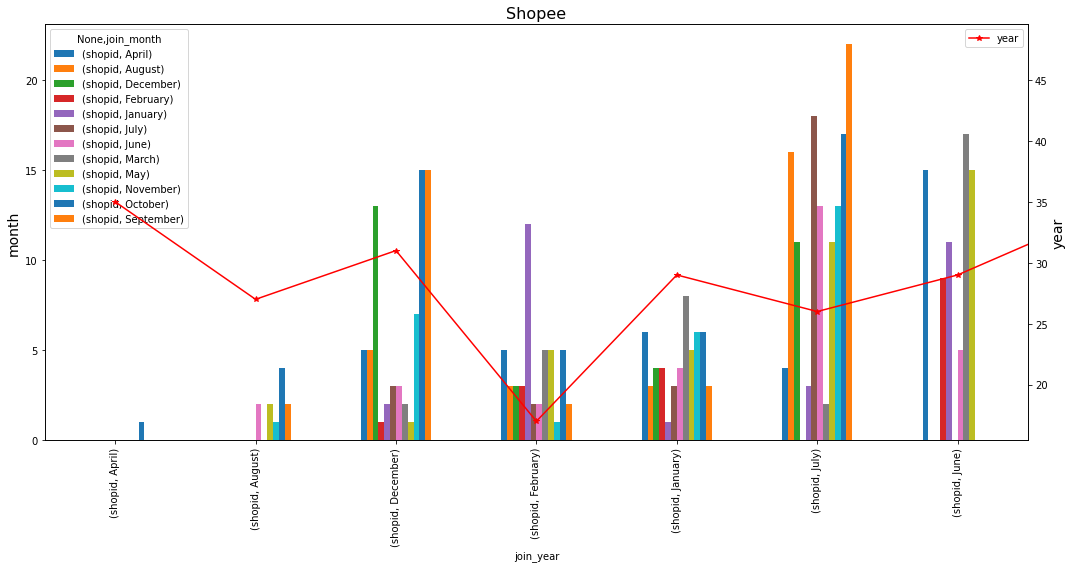

In [52]:
month_and_year.plot.bar()
axes1 = plt.gca()
axes2 = axes1.twinx()
year.plot.line(marker = '*',ax = axes2, color = 'red', label = 'year')
axes1.set_ylabel('month', fontsize = 14)
axes2.set_ylabel('year', fontsize = 14)
plt.legend(loc = 1)
plt.title('Shopee', fontsize = 16)

###   Vẽ biểu đồ thể hiện phân bố của điểm đánh giá trung bình. 

Text(0.5, 1.0, 'phân bố điểm của đáng giá trung bình')

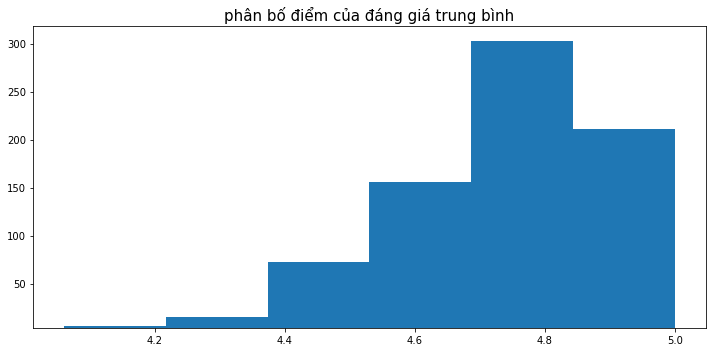

In [54]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.hist(x = df['rating_star'], bins = 6 , bottom = 4)
plt.title('phân bố điểm của đáng giá trung bình', fontsize = 15)


### Vẽ biểu đồ thể hiện mối quan hệ giữa: 
- Tỉ lệ phản hồi với số lượt khách hàng đánh giá tốt
- Thời gian phản hồi (đơn vị giây) với số lượt khách hàng đánh giá tốt.

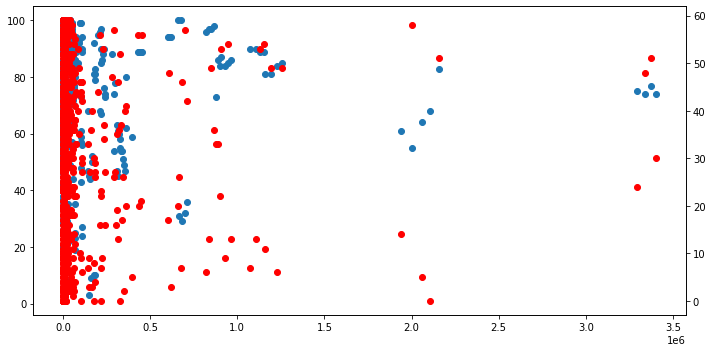

In [65]:
plt.scatter(x = df['rating_good'], y = df['response_rate'], label = 'phản hồi tốt')
axes1 = plt.gca()
axes2 = axes1.twinx()
axes2.scatter(x = df['rating_good'], y = df['response_time'].dt.second, label = 'giây', color = 'red')

In [64]:
df['response_time'] = pd.to_datetime(df['response_time'].str.strip())